In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
ROOT_DIR = "../Datasets"

ds_path = os.path.join(ROOT_DIR, "vgsales-12-4-2019-short.csv")
df = pd.read_csv(ds_path)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           55792 non-null  int64  
 1   Name           55792 non-null  object 
 2   Genre          55792 non-null  object 
 3   ESRB_Rating    23623 non-null  object 
 4   Platform       55792 non-null  object 
 5   Publisher      55792 non-null  object 
 6   Developer      55775 non-null  object 
 7   Critic_Score   6536 non-null   float64
 8   User_Score     335 non-null    float64
 9   Total_Shipped  1827 non-null   float64
 10  Global_Sales   19415 non-null  float64
 11  NA_Sales       12964 non-null  float64
 12  PAL_Sales      13189 non-null  float64
 13  JP_Sales       7043 non-null   float64
 14  Other_Sales    15522 non-null  float64
 15  Year           54813 non-null  float64
dtypes: float64(9), int64(1), object(6)
memory usage: 6.8+ MB


In [3]:
# only keep columns of interest 
df1 = df[['Publisher']]
df1

,Publisher
0,Nintendo
1,Nintendo
2,Nintendo
3,PUBG Corporation
4,Nintendo
...,...
55787,505 Games
55788,Mooneye Studios
55789,Mooneye Studios
55790,Mooneye Studios


In [4]:
df2 = df1.to_numpy()
df2 = np.ndarray.bflatten(df2)
df2

array(['Nintendo', 'Nintendo', 'Nintendo', ..., 'Mooneye Studios',
       'Mooneye Studios', 'Unknown'], dtype=object)

In [6]:
len(df2)

55792

In [5]:
# view the number of each publisher
view_counted = {}

for i in df2:
    if i not in view_counted: view_counted[i] = 1
    else: view_counted[i] += 1
view_counted = dict(sorted(view_counted.items(), key=lambda kv: kv[1], reverse=True))
print(view_counted)

{'Unknown': 4891, 'Sega': 2085, 'Activision': 1519, 'Ubisoft': 1519, 'Electronic Arts': 1498, 'Konami': 1495, 'Sony Computer Entertainment': 1354, 'Nintendo': 1351, 'Microsoft': 1267, 'THQ': 1065, 'Capcom': 964, 'Atari': 828, 'EA Sports': 757, 'Square Enix': 576, 'Bandai': 566, 'Namco Bandai': 554, 'Acclaim Entertainment': 511, 'Hudson Soft': 460, 'Namco Bandai Games': 452, 'Namco': 441, 'D3 Publisher': 432, 'KOEI': 417, 'Atlus': 409, 'Midway Games': 360, 'Eidos Interactive': 323, 'Disney Interactive Studios': 296, 'Hamster Corporation': 287, 'Majesco': 280, 'Codemasters': 275, 'Idea Factory': 269, 'Tecmo Koei': 256, 'Sierra Entertainment': 249, 'LucasArts': 245, 'Taito': 245, '505 Games': 237, 'Warner Bros. Interactive Entertainment': 233, '2K Games': 217, '2K Sports': 212, 'Bethesda Softworks': 203, 'Infogrames': 196, 'Interplay': 196, 'Crave Entertainment': 195, 'Microsoft Game Studios': 191, 'Virgin Interactive': 189, 'SNK': 187, 'Deep Silver': 185, 'Sunsoft': 182, 'Banpresto': 179

In [18]:
view_counted2 = {}
i = 0
for k in view_counted:
    if i == 10: break
    view_counted2[k] = view_counted[k]
    i += 1
view_counted2

{'Unknown': 4891,
 'Sega': 2085,
 'Activision': 1519,
 'Ubisoft': 1519,
 'Electronic Arts': 1498,
 'Konami': 1495,
 'Sony Computer Entertainment': 1354,
 'Nintendo': 1351,
 'Microsoft': 1267,
 'THQ': 1065}

In [19]:
view_counted2_count = 0
for k in view_counted2:
    view_counted2_count += view_counted2[k]
view_counted2_count

18044

In [27]:
name = []
data = []
for k in view_counted2:
#     print(k, end=": ")
    percent = view_counted2[k]*100/float(view_counted2_count)
#     print(percent, end="% \n")
    s = "%s: %0.2f%%" % (k, percent)
    name.append(s)
    data.append(view_counted2[k])
    print(s)

Unknown: 27.11%
Sega: 11.56%
Activision: 8.42%
Ubisoft: 8.42%
Electronic Arts: 8.30%
Konami: 8.29%
Sony Computer Entertainment: 7.50%
Nintendo: 7.49%
Microsoft: 7.02%
THQ: 5.90%


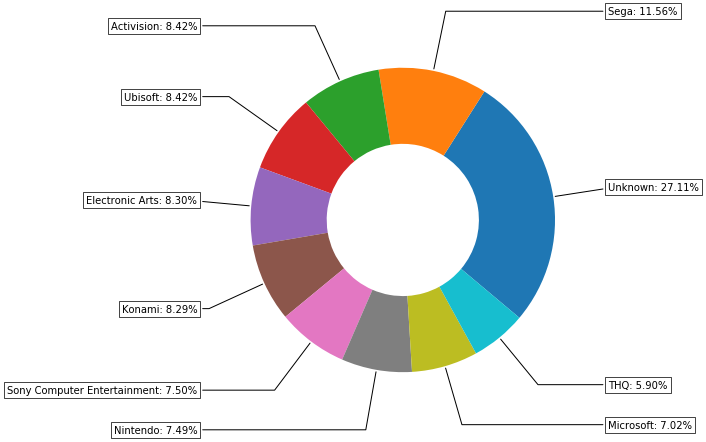

In [30]:
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(name[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

plt.show()